In [1]:
import os
import pyrootutils
PROJECT_ROOT_DIR = pyrootutils.setup_root(os.path.abspath(''), dotenv=True, pythonpath=True)
os.chdir(PROJECT_ROOT_DIR)

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from src.utils_data_centric import (
    _get_all_data_set_characteristics,
)

from src.utils_visualization import NotebookFigureSaver

CHAPTER_ID = "c_data_centric_aggregation"
fig_saver = NotebookFigureSaver(CHAPTER_ID)

  0%|          | 0/30 [00:00<?, ?it/s]

 97%|█████████▋| 29/30 [00:17<00:00,  1.94it/s]

array must not contain infs or NaNs
array must not contain infs or NaNs
array must not contain infs or NaNs


100%|██████████| 30/30 [00:18<00:00,  1.59it/s]


Saving figure data_set_descriptives_subset_30


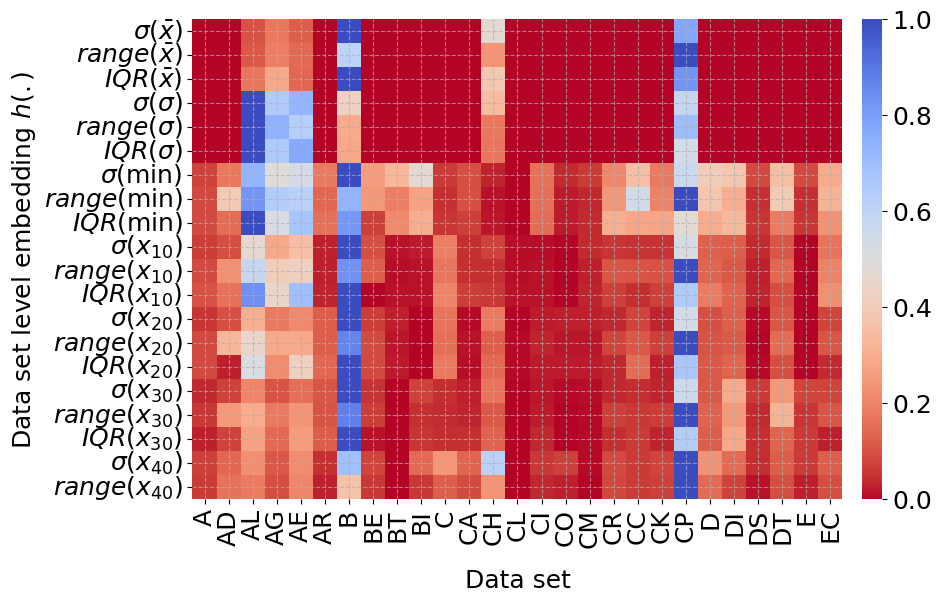

In [2]:
def generate_short_labels_with_mapping(labels, max_length=5):
    """
    This function creates shortened labels for a list of input labels, primarily by using the first
    letter of each word in the label. If the generated short label is not unique, it attempts to
    make it unique by appending additional characters or a numeric identifier. This is useful in
    contexts where display space is limited, but distinct identification of each label is necessary.

    Parameters:
    - labels (list of str): The original labels to be shortened.
    - max_length (int): The maximum length of the shortened labels. Default is 5.

    Returns:
    - tuple: A tuple containing two elements:
        - A list of unique, shortened labels.
        - A dictionary mapping from the original labels to their shortened versions.
    """
    
    short_labels = {label: ''.join([word[0] for word in label.split()][:max_length]).upper() for label in labels}
    unique_labels = {}
    mapping = {}
    for original, short in short_labels.items():
        if short not in unique_labels.values():
            unique_labels[original] = short
            mapping[original] = short
        else:
            # Attempt to differentiate by appending additional characters or a numeric identifier
            for i in range(1, len(original)):
                new_short = (short[:max_length-1] + original[i]).upper()
                if new_short not in unique_labels.values():
                    unique_labels[original] = new_short
                    mapping[original] = new_short
                    break
            else:
                counter = 1
                while f"{short[:max_length-1]}{counter}" in unique_labels.values():
                    counter += 1
                new_label = f"{short[:max_length-1]}{counter}"
                unique_labels[original] = new_label
                mapping[original] = new_label

    # Return the final unique, shortened labels and the mapping
    return list(unique_labels.values()), mapping



def _visualize_descriptives_data_set(
    number_data_sets=None,
    normalize_each_characteristic=True,
    number_embedding_shown=20,
    save_figure=False,
):
    """
    Visualizes the normalized characteristics of datasets as a heatmap.

    This function generates a heatmap visualization of the dataset characteristics. Characteristics are normalized
    across datasets if specified. Each column in the heatmap represents a dataset, and each row represents a 
    normalized characteristic of these datasets. The function supports visualizing a subset or all datasets and 
    includes the option to save the generated figure.

    Parameters:
    - number_data_sets (int, optional): The number of datasets to include in the visualization. If None, all datasets
      are considered. Default is None.
    - normalize_each_characteristic (bool): Determines whether to normalize each characteristic across the datasets.
      If True, each characteristic is scaled to a range [0, 1]. Default is True.
    - number_embedding_shown (int): The number of dataset characteristics (embedding dimensions) to display in the 
      heatmap. Default is 20.
    - save_figure (bool): If True, the generated figure is saved using a predefined naming scheme. Default is False.

    Returns:
    - mapping (dict): A mapping from the original dataset labels to their shortened versions used in the heatmap's
      x-axis labels. This is useful for reference when the original dataset names are too long for the figure.
    """
    
    normalized_data_set_characteristics = _get_all_data_set_characteristics(
        number_data_sets=number_data_sets,
        normalize_each_characteristic=normalize_each_characteristic,
    )
    fig_size = (10, 6)
    fig, ax = plt.subplots(1, 1, figsize=fig_size, sharex=False, sharey=True)

    cbar_ax = fig.add_axes([0.92, 0.15, 0.02, .8])

    sns.heatmap(
        normalized_data_set_characteristics.iloc[:, :number_embedding_shown].T,
        cmap="coolwarm_r",
        ax=ax,
        cbar_ax=cbar_ax,
        annot=False,
        cbar=True,
    )

    cbar = ax.collections[0].colorbar
    cbar.ax.tick_params(labelsize=18)
    ax.set_ylabel("Data set level embedding $h(.)$", fontsize=18)  # Set the y-axis label
    ax.tick_params(axis="x",labelsize=18)
    ax.tick_params(axis="y", labelsize=18)
    ax.grid(visible=True, linestyle="--", alpha=0.7)
    
    tick_labels = [(label.get_text()) for label in ax.get_xticklabels()]
    shortened_labels, mapping = generate_short_labels_with_mapping(list(tick_labels))

    ax.set_xticklabels(shortened_labels, rotation=90, ha="center")  #.set_xticklabels
    ax.set_xlabel("Data set", fontsize=18, labelpad=15)
    
    plt.subplots_adjust(hspace=.5, wspace=0.05,left=0.25,right=0.9,bottom=0.15, top=.95) 

    if save_figure:
        if number_data_sets is None:
            fig_saver.save_fig(f"data_set_descriptives_all")
        else:
            fig_saver.save_fig(f"data_set_descriptives_subset_{number_data_sets}")

    plt.show()
    
    return mapping


mapping = _visualize_descriptives_data_set(
    number_data_sets=30,
    number_embedding_shown=20,
    normalize_each_characteristic=True,
    save_figure=True,
)